In [4]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [6]:
for dirname, _, filenames in os.walk('sugar_cane'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

sugar_cane\Healthy\healthy (1).jpeg
sugar_cane\Healthy\healthy (10).jpeg
sugar_cane\Healthy\healthy (100).jpeg
sugar_cane\Healthy\healthy (101).jpeg
sugar_cane\Healthy\healthy (102).jpeg
sugar_cane\Healthy\healthy (103).jpeg
sugar_cane\Healthy\healthy (104).jpeg
sugar_cane\Healthy\healthy (105).jpeg
sugar_cane\Healthy\healthy (106).jpeg
sugar_cane\Healthy\healthy (107).jpeg
sugar_cane\Healthy\healthy (108).jpeg
sugar_cane\Healthy\healthy (109).jpeg
sugar_cane\Healthy\healthy (11).jpeg
sugar_cane\Healthy\healthy (110).jpeg
sugar_cane\Healthy\healthy (111).jpeg
sugar_cane\Healthy\healthy (112).jpeg
sugar_cane\Healthy\healthy (113).jpeg
sugar_cane\Healthy\healthy (114).jpeg
sugar_cane\Healthy\healthy (115).jpeg
sugar_cane\Healthy\healthy (116).jpeg
sugar_cane\Healthy\healthy (117).jpeg
sugar_cane\Healthy\healthy (118).jpeg
sugar_cane\Healthy\healthy (119).jpeg
sugar_cane\Healthy\healthy (12).jpeg
sugar_cane\Healthy\healthy (120).jpeg
sugar_cane\Healthy\healthy (121).jpeg
sugar_cane\Health

In [9]:
data_dir = r'sugar_cane'
batch_size = 32
img_height = 180
img_width = 180
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2521 files belonging to 5 classes.
Using 2017 files for training.


In [10]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2521 files belonging to 5 classes.
Using 504 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['Healthy', 'Mosaic', 'RedRot', 'Rust', 'Yellow']


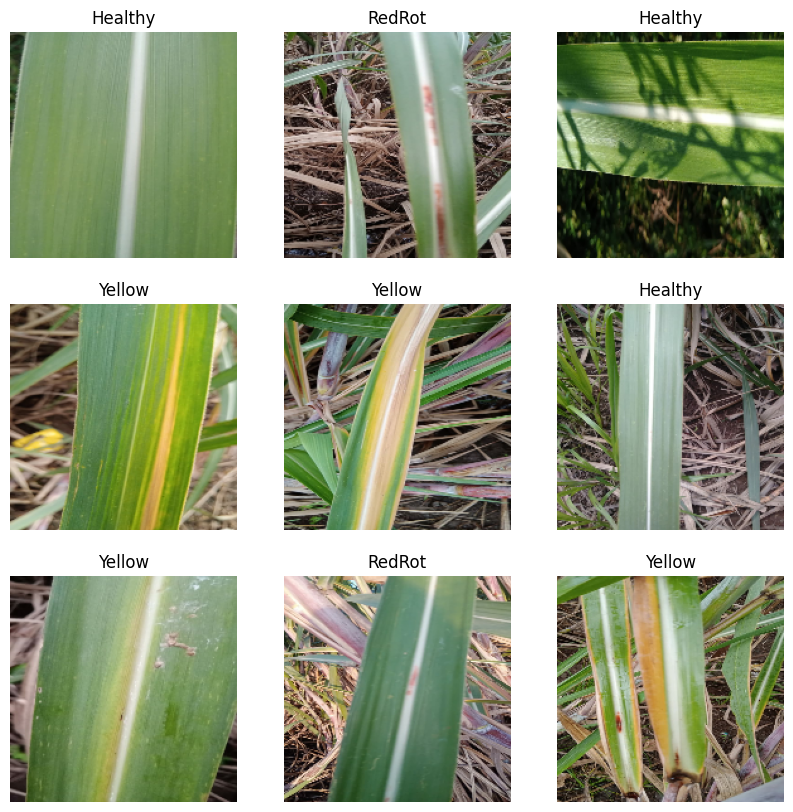

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [13]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [18]:
model = keras.Sequential([
    layers.InputLayer(input_shape=[180, 180, 3]),
    
    layers.RandomContrast(factor=0.10),
    layers.RandomFlip(mode='horizontal_and_vertical'),
    layers.RandomRotation(factor=0.10),

    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPool2D((2, 2)),

    layers.BatchNormalization(),    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPool2D((2, 2)),

    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPool2D((2, 2)),

    layers.BatchNormalization(),
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(5, activation='softmax')
])


In [26]:
model.save("sugarcane.keras")


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_contrast_2               │ (None, 180, 180, 3)    │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_2 (RandomFlip)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_2               │ (None, 180, 180, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 180, 180, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 90, 90, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 45, 45, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 45, 45, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 22, 22, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,964,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             

 Total params: 4,268,177 (16.28 MB)

 Trainable params: 4,266,571 (16.28 MB)

 Non-trainable params: 1,606 (6.27 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam

initial_learning_rate = 0.001 
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [21]:
def lr_schedule(epoch):
    if epoch < 10:
        return 0.001  
    elif 10 <= epoch < 20:
        return 0.0005  
    else:
        return 0.0001  

learning_rate_scheduler = LearningRateScheduler(lr_schedule)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

epochs = 40
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[learning_rate_scheduler, early_stopping]
)

Epoch 1/40


c:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


64/64 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.2984 - loss: 2.0312 - val_accuracy: 0.4901 - val_loss: 1.3600 - learning_rate: 0.0010
Epoch 2/40
64/64 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.4731 - loss: 1.4011 - val_accuracy: 0.2639 - val_loss: 2.5986 - learning_rate: 0.0010
Epoch 3/40
64/64 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.5389 - loss: 1.2650 - val_accuracy: 0.3690 - val_loss: 2.0551 - learning_rate: 0.0010
Epoch 4/40
64/64 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.5939 - loss: 1.0553 - val_accuracy: 0.3690 - val_loss: 1.9992 - learning_rate: 0.0010
Epoch 5/40
64/64 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.6316 - loss: 0.9752 - val_accuracy: 0.5893 - val_loss: 1.1294 - learning_rate: 0.0010
Epoch 6/40
64/64 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.6828 - loss: 0.8906 - val_accuracy: 0.6230 - val_loss: 1.0228 - learning_rate: 0.0010
Epoch 7/40
64/64 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.7020 - loss: 0.8115 - val_accuracy: 0.6667 - va

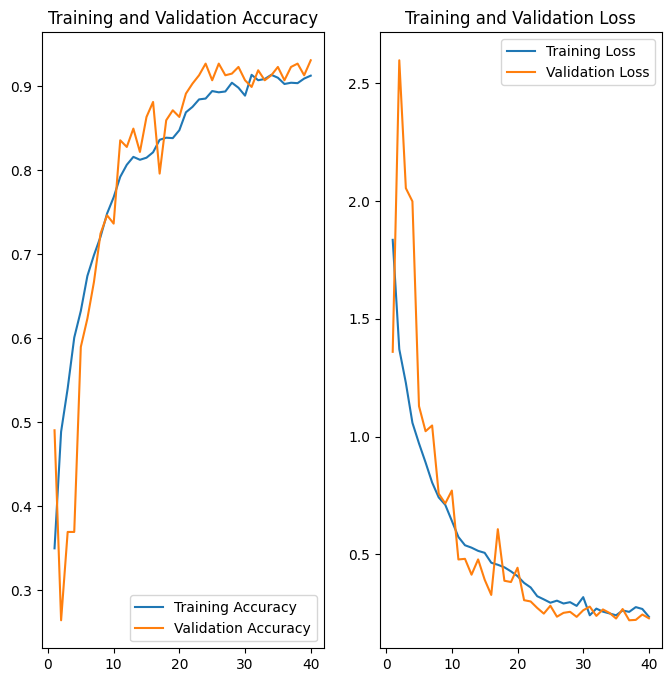

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)  # Use the actual number of epochs

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [27]:
from tensorflow.keras.preprocessing import image
def preprocess_image(img_path, target_size=(180, 180)):
    img = image.load_img(img_path, target_size=target_size)  # Load image
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions (batch size of 1)
    img_array = img_array / 255.0  # Normalize (if your model was trained with normalization)
    return img_array


In [31]:
import os

data_dir = "sugar_cane"  # Update this path
class_names = os.listdir(data_dir)  # Sorts alphabetically
print(class_names)


['Healthy', 'Mosaic', 'RedRot', 'Rust', 'Yellow']


In [39]:
img_path = r"sugar_cane\Yellow\yellow (1).jpeg"  # Image path
img_array = preprocess_image(img_path)

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)  # Get class index

print(f"Predicted class: {predicted_class}")
class_labels = ["Healthy", "Mosaic","RedRot", "Rust", "Yellow"]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted class: 0


In [40]:
img_paths = [
    r"sugar_cane\Mosaic\mosaic (1).jpeg",
    r"sugar_cane\RedRot\redrot (1).jpeg",
    r"sugar_cane\Yellow\yellow (1).jpeg"
]

for img_path in img_paths:
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    print(f"Image: {img_path} → Predicted: {class_labels[predicted_class]}, Probabilities: {predictions}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image: sugar_cane\Mosaic\mosaic (1).jpeg → Predicted: Healthy, Probabilities: [[9.8358387e-01 3.9429143e-03 3.6933023e-04 1.2097416e-02 6.4231667e-06]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Image: sugar_cane\RedRot\redrot (1).jpeg → Predicted: Healthy, Probabilities: [[9.8344535e-01 3.9254408e-03 3.7277178e-04 1.2249947e-02 6.4310511e-06]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image: sugar_cane\Yellow\yellow (1).jpeg → Predicted: Healthy, Probabilities: [[9.8368454e-01 3.9473455e-03 3.6726947e-04 1.1994426e-02 6.3929247e-06]]


In [41]:
for img_path in ["sugar_cane/Mosaic/mosaic (1).jpeg", "sugar_cane/RedRot/redrot (1).jpeg", "sugar_cane/Yellow/yellow (1).jpeg"]:
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)[0]  # Get the probability array
    
    top_indices = np.argsort(predictions)[::-1][1:4]  # Get 2nd, 3rd, and 4th highest classes
    
    print(f"\nImage: {img_path}")
    for rank, idx in enumerate(top_indices, start=2):
        print(f"{rank}nd Predicted: {class_labels[idx]} → Probability: {predictions[idx]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

Image: sugar_cane/Mosaic/mosaic (1).jpeg
2nd Predicted: Rust → Probability: 0.0121
3nd Predicted: Mosaic → Probability: 0.0039
4nd Predicted: RedRot → Probability: 0.0004
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Image: sugar_cane/RedRot/redrot (1).jpeg
2nd Predicted: Rust → Probability: 0.0122
3nd Predicted: Mosaic → Probability: 0.0039
4nd Predicted: RedRot → Probability: 0.0004
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Image: sugar_cane/Yellow/yellow (1).jpeg
2nd Predicted: Rust → Probability: 0.0120
3nd Predicted: Mosaic → Probability: 0.0039
4nd Predicted: RedRot → Probability: 0.0004
